In [32]:
import cv2
import os
import numpy as np
import pandas as pd
import face_recognition
import matplotlib.pyplot as plt

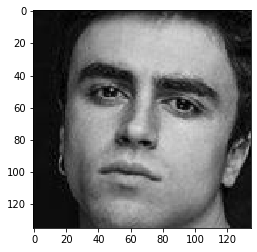

In [77]:
frame = plt.imread("images/try.jpg", 1)
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(frame, 1.3, 5)
for (x, y, w, h) in faces:
    roi = frame[y:y + h, x:x + w]
    plt.figure()
    plt.imshow(roi)

In [3]:
known_image = face_recognition.load_image_file("images/nairobi.jpg")
unknown_image = face_recognition.load_image_file("images/try11.jpg")

biden_encoding = face_recognition.face_encodings(known_image)[0]
unknown_encoding = face_recognition.face_encodings(unknown_image)[0]

results = face_recognition.compare_faces([biden_encoding], unknown_encoding)


In [ ]:
d = np.zeros ([1,10])
database= pd.DataFrame(d)
database.to_csv('Section1/database.csv')

In [39]:
d = np.zeros ([1,384])
database= pd.DataFrame(d)
database.to_csv('Section1/database.csv')

In [69]:
import csv

def add_to_database (img1,img2,img3,id):
    known_image = face_recognition.load_image_file(img1)
    encoding1 = face_recognition.face_encodings(known_image)[0]

    known_image = face_recognition.load_image_file(img2)
    encoding2 = face_recognition.face_encodings(known_image)[0]

    known_image = face_recognition.load_image_file(img3)
    encoding3 = face_recognition.face_encodings(known_image)[0]
    
    encoding=np.concatenate((encoding1,encoding2,encoding3) , axis=0)
    database.loc[id]=encoding
    database.to_csv('Section2/database.csv')
            
    

[(238, 352, 281, 309), (66, 317, 102, 281), (86, 653, 122, 617), (238, 160, 281, 117), (65, 199, 108, 156), (65, 415, 108, 371), (252, 698, 295, 655), (223, 828, 266, 784), (55, 544, 98, 501), (74, 761, 110, 725), (242, 530, 286, 487)]


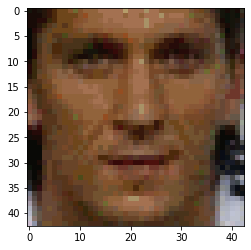

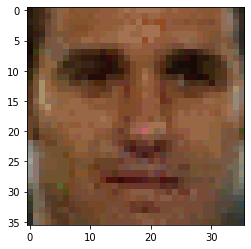

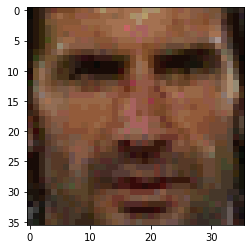

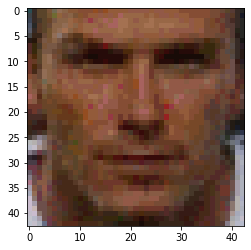

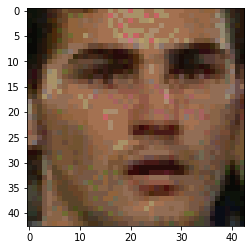

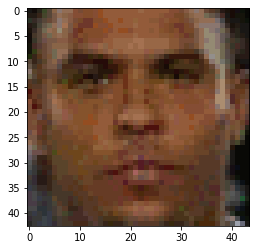

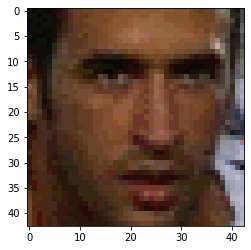

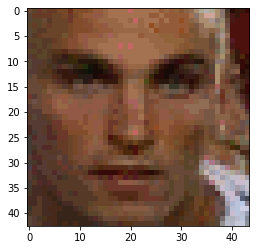

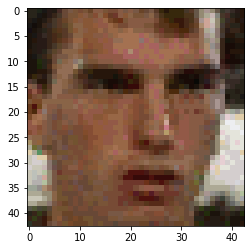

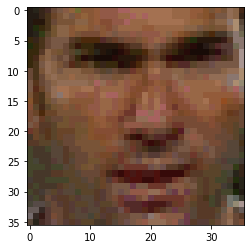

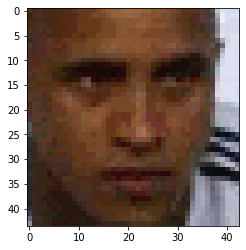

In [67]:
image = face_recognition.load_image_file("Section2/team.jpg")
face_locations = face_recognition.face_locations(image )
for (top,right,bottom,left) in face_locations:
    roi = image[ top:bottom ,left:right ]
    #enhance()
    plt.figure()
    plt.imshow(roi)
print(face_locations)

In [70]:
add_to_database("Section1/berlin.jpg","Section1/berlin1.jpg","Section1/berlin2.jpg","berlin") 
add_to_database("Section1/denver.jpg","Section1/denver1.jpg","Section1/denver2.jpg","denver") 
add_to_database("Section1/helsinki.jpg","Section1/helsinki1.jpg","Section1/helsinki2.jpg","helsinki") 
add_to_database("Section1/lisbon.jpg","Section1/lisbon1.jpg","Section1/lisbon2.jpg","lisbon") 
add_to_database("Section1/marsella.jpg","Section1/marsella1.jpg","Section1/marsella2.jpg","marsella") 
add_to_database("Section1/nairobi.jpg","Section1/nairobi1.jpg","Section1/nairobi2.jpg","nairobi") 
add_to_database("Section1/Palermo.jpg","Section1/Palermo1.jpg","Section1/Palermo2.jpg","Palermo") 
add_to_database("Section1/professor.jpg","Section1/professor1.jpg","Section1/professor2.jpg","professor")
add_to_database("Section1/rio.jpg","Section1/rio1.jpg","Section1/rio2.jpg","rio") 
add_to_database("Section1/stockholm.jpg","Section1/stockholm1.jpg","Section1/stockholm3.jpg","stockholm") 
add_to_database("Section1/tokyo.jpg","Section1/tokyo1.jpg","Section1/tokyo2.jpg","tokyo") 



In [71]:

def who_is_it(image_path):
    image = face_recognition.load_image_file(image_path)
    face_locations = face_recognition.face_locations(image )
    database = pd.read_csv('Section2/database.csv',index_col=0)
    for (top,right,bottom,left) in face_locations:
        roi = image[ top:bottom ,left:right ]
        plt.figure()
        plt.imshow(roi)
        unknown_encoding = face_recognition.face_encodings(roi)
        if (len(unknown_encoding) == 0):
            print("skipped ...")
            continue
        unknown_encoding = unknown_encoding[0]
        identity = 0
        min_dist = 100
        for id , db_enc in database.iterrows():
            dist1 = np.linalg.norm(db_enc[:128] - unknown_encoding)
            dist2 = np.linalg.norm(db_enc[128:256] - unknown_encoding)
            dist3 = np.linalg.norm(db_enc[256:] - unknown_encoding)
            dist_avg = min(dist1,dist2,dist3)
            if dist_avg < min_dist:
                min_dist = dist_avg
                identity = id

        if min_dist > 0.6:
            print("Not in the database." )
        else:
            print ("it's " + str(identity) + ", the distance is " + str(min_dist))
    

In [68]:
d = np.zeros ([1,384])
database= pd.DataFrame(d)
database.to_csv('Section2/database.csv')

In [74]:
add_to_database("Section2/beckham.jpg","Section2/beckham2.jpg","Section2/beckham1.jpg","beckham") 
add_to_database("Section2/carlos.jpg","Section2/carlos1.jpg","Section2/carlos2.jpg","carlos") 
add_to_database("Section2/casillas.jpg","Section2/casillas1.jpg","Section2/casillas2.jpg","casillas") 
add_to_database("Section2/figo.jpg","Section2/figo1.jpg","Section2/figo2.jpg","figo") 
add_to_database("Section2/ronaldo.jpg","Section2/ronaldo1.jpg","Section2/ronaldo2.jpg","ronaldo") 
add_to_database("Section2/raul.jpg","Section2/raul1.jpg","Section2/raul2.jpg","raul") 
add_to_database("Section2/selgado.jpg","Section2/selgado1.jpg","Section2/selgado2.jpg","selgado") 
add_to_database("Section2/zidane.jpg","Section2/zidane1.jpg","Section2/zidane2.jpg","zidane") 






it's selgado, the distance is 0.5207648135991828
Not in the database.
it's figo, the distance is 0.43621295047033787
it's beckham, the distance is 0.431156507591171
it's casillas, the distance is 0.3483985082295936
it's ronaldo, the distance is 0.5094947231950016
it's raul, the distance is 0.37805057533042336
Not in the database.
Not in the database.
it's zidane, the distance is 0.4606522722934418
it's carlos, the distance is 0.4090211724000092


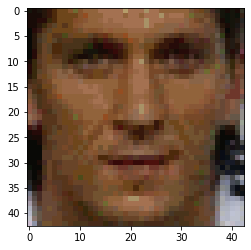

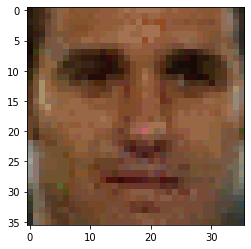

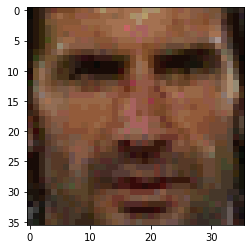

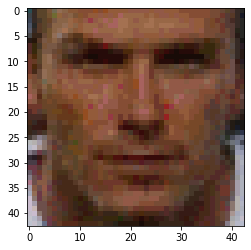

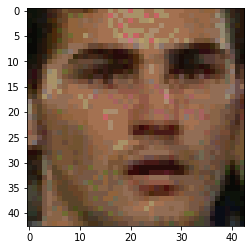

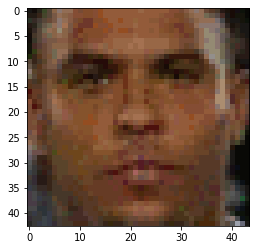

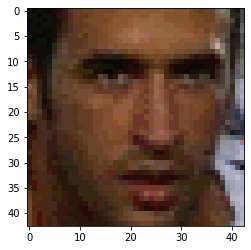

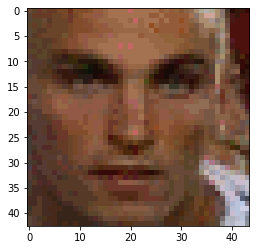

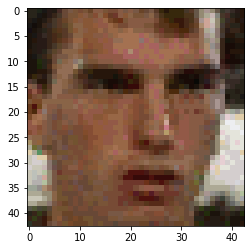

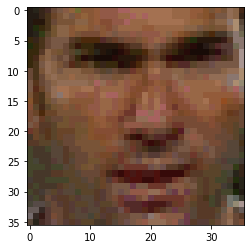

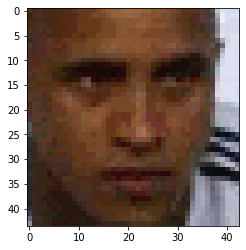

In [76]:
who_is_it("Section2/team.jpg")